In [1]:
import jax.numpy as jnp
from jax import grad,vmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

/home/kawahara/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#sample utility function
A=1.0
def u(x):
    return jnp.log(A+x)

In [3]:
def ARA(xarr):
    den=vmap(grad(grad(u)))
    bun=vmap(grad(u))
    return -den(xarr)/bun(xarr)

In [4]:
def RRA(xarr):
    den=vmap(grad(grad(u)))
    bun=vmap(grad(u))
    return -den(xarr)/bun(xarr)*xarr

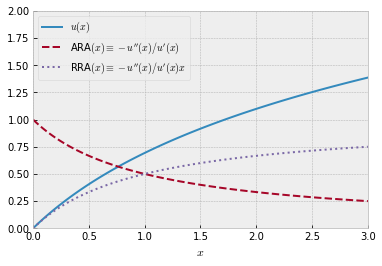

In [5]:
x_=jnp.linspace(0,3,100)
plt.plot(x_,u(x_),label="$u(x)$")
plt.plot(x_,ARA(x_),label="ARA$(x) \equiv - u^{\prime\prime}(x)/u^\prime (x)$",ls="dashed")
plt.plot(x_,RRA(x_),label="RRA$(x) \equiv - u^{\prime\prime}(x)/u^\prime (x) x$",ls="dotted")
plt.legend()
plt.xlabel("$x$")
plt.xlim(0.,3.0)
plt.ylim(0,2)
plt.savefig("autograd3.pdf")

In [6]:
# u(x,A)

In [8]:
#sample utility function
def u(x,A):
    return jnp.log(A+x)

In [9]:
def ARA(xarr,A):
    den=vmap(grad(grad(u,argnums=(0)),argnums=(0)), (0, None), 0)
    bun=vmap(grad(u,argnums=(0)), (0, None), 0)
    return -den(xarr,A)/bun(xarr,A)

In [10]:
def RRA(xarr,A):
    den=vmap(grad(grad(u,argnums=(0)),argnums=(0)), (0, None), 0)
    bun=vmap(grad(u,argnums=(0)), (0, None), 0)
    return -den(xarr,A)/bun(xarr,A)*xarr

Text(0.5, 0, '$x$')

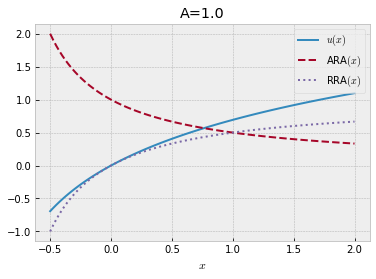

In [11]:
Ain=1.0
x_=jnp.linspace(-Ain+0.5,-Ain+3,100)
plt.title("A="+str(Ain))
plt.plot(x_,u(x_,Ain),label="$u(x)$")
plt.plot(x_,ARA(x_,Ain),label="ARA$(x)$",ls="dashed")
plt.plot(x_,RRA(x_,Ain),label="RRA$(x)$",ls="dotted")
plt.legend()
plt.xlabel("$x$")

In [12]:
def dARA(xarr,A):
    den=grad(grad(u,argnums=(0)),argnums=(0))
    bun=grad(u,argnums=(0))
    g=lambda x,A:-den(x,A)/bun(x,A)
    h=vmap(grad(g,argnums=(0)), (0, None), 0)
    return h(xarr,A)

In [13]:
def dRRA(xarr,A):
    den=grad(grad(u,argnums=(0)),argnums=(0))
    bun=grad(u,argnums=(0))
    g=lambda x,A:-den(x,A)/bun(x,A)*x
    h=vmap(grad(g,argnums=(0)), (0, None), 0)
    return h(xarr,A)

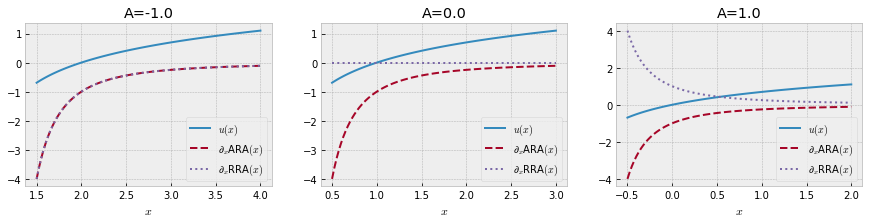

In [15]:

Aarr=[-1.0,0.0,1.0]

fig=plt.figure(figsize=(15,3))
for i,Ain in enumerate(Aarr):
    ax=fig.add_subplot(1,3,i+1)
    x_=jnp.linspace(-Ain+0.5,-Ain+3,100)
    plt.title("A="+str(Ain))
    ax.plot(x_,u(x_,Ain),label="$u(x)$")
    ax.plot(x_,dARA(x_,Ain),label="$\partial_x$ARA$(x)$",ls="dashed")
    ax.plot(x_,dRRA(x_,Ain),label="$\partial_x$RRA$(x)$",ls="dotted")
    plt.legend()
    plt.xlabel("$x$")
plt.savefig("autograd4.pdf", bbox_inches="tight", pad_inches=0.0)